In [39]:
import urllib.request
urllib.request.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 'train.csv')
urllib.request.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', 'test.csv')

('test.csv', <http.client.HTTPMessage at 0x7f46087f09b0>)

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import keras

In [2]:
column_names = ['age', 'workclass', 'fnlweight', 'education', 'education_num', 'martial-status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'label']
df = pd.read_csv('train.csv', names = column_names)
test = pd.read_csv('test.csv', names=column_names, skiprows=1)

# Looking at the data

In [3]:
# First look at the dataset
# Seems like we may not need to clean the data as there are no null values
df.isnull().sum()

age               0
workclass         0
fnlweight         0
education         0
education_num     0
martial-status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
label             0
dtype: int64

In [4]:
# General overview look of the data
df.describe(include='all')

,age,workclass,fnlweight,education,education_num,martial-status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,label
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [5]:
# Lets look at how the data actually looks like
# capital_gain and capital_loss seem to be quite special with quite a lot of 0
# Do education num match with their nums? Which is better? or both
# Workclass, martial-status, occupation, race and sex prob has to be one-hot encoded
# native_country prob has to as well
# Label im not sure what to do with it yet
df.head(10)

,age,workclass,fnlweight,education,education_num,martial-status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [6]:
# Investigating the werid columns
# Quite a big range, may need to standardise
df['capital_gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capital_gain, Length: 119, dtype: int64

In [7]:
# Same with capital loss
# Seems like majority of people do not have capital losses
df['capital_loss'].value_counts()

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: capital_loss, Length: 92, dtype: int64

In [8]:
# Ill take education as it is a categorical feature not a continous feature
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [9]:
# Looking at relationships
df['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

# Data engineering

In [10]:
# First I will be converting the labels to 0 and 1
# 0 -> >50K and 1 -> <=50K
label_map = {' >50K' : 0, ' <=50K': 1}
df['label'] = df['label'].map(label_map)

In [11]:
# Fitting the minmax scaler for the data
scaler = MinMaxScaler()
df[['fnlweight', 'capital_gain', 'capital_loss']] = scaler.fit_transform(df[['fnlweight', 'capital_gain', 'capital_loss']])

In [12]:
# Dropping columns that are not need
df = df.drop(['education_num'], axis=1)

In [13]:
# Placing the whole thing into one function
# Mainly a reference cell, there was a problem when I tried to use this on the test set
def data_prep(data):
    df = data.copy()
    label_map = {' >50K' : 0, ' <=50K': 1}
    df['label'] = df['label'].map(label_map)
    scaler = MinMaxScaler()
    df[['fnlweight', 'capital_gain', 'capital_loss']] = scaler.fit_transform(df[['fnlweight', 'capital_gain', 'capital_loss']])
    df = df.drop(['education_num'], axis=1)
    return df

# Preparing data and training model

In [14]:
# Function to convert pandas dataframe to tf btaches to be used as input
# Taken from TF tutorial on how to make a tf model
def df_to_dataset(df, shuffle=True, batch_size=32):
    df = df.copy()
    labels = df.pop('label')
    ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(df))
    ds = ds.batch(batch_size)
    return ds

In [15]:
# Setting up data in batches
train, val = train_test_split(df, test_size=0.2, random_state=42069)
train = df_to_dataset(train)
val = df_to_dataset(val)

In [16]:
# Setting up the tf.features
feature_columns = []
# Categorical features
for cat, hash_code in zip(['workclass', 'education', 'martial-status', 'occupation', 'relationship', 'race', 'sex', 'native_country'], range(10, 19)):
    hash_cat = tf.feature_column.categorical_column_with_hash_bucket(cat, hash_bucket_size = hash_code)
    feature_columns.append(tf.feature_column.indicator_column(hash_cat))
    
# Continous features
for cat in ['age', 'fnlweight', 'capital_gain', 'capital_loss', 'hours_per_week']:
    feature_columns.append(tf.feature_column.numeric_column(cat))

# Creating the dense layer here
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [17]:
# Creating the model in keras
model = tf.keras.Sequential([
  feature_layer,
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compileing model
# binary_croessentropy is used as this is a binary classification
# Here we only care about accuracy
# Optimiser could be tested out
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
%%time
# Fitting the model
history = model.fit(train, validation_data=val, epochs=10)

Epoch 1/10
814/814 [==============================] - 11s 13ms/step - loss: 0.3328 - accuracy: 0.8411 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
814/814 [==============================] - 9s 11ms/step - loss: 0.3324 - accuracy: 0.8419 - val_loss: 0.3383 - val_accuracy: 0.8412
Epoch 3/10
814/814 [==============================] - 11s 13ms/step - loss: 0.3303 - accuracy: 0.8433 - val_loss: 0.3347 - val_accuracy: 0.8449
Epoch 4/10
814/814 [==============================] - 9s 11ms/step - loss: 0.3275 - accuracy: 0.8451 - val_loss: 0.3402 - val_accuracy: 0.8399
Epoch 5/10
814/814 [==============================] - 9s 11ms/step - loss: 0.3272 - accuracy: 0.8462 - val_loss: 0.3301 - val_accuracy: 0.8466
Epoch 6/10
814/814 [==============================] - 10s 12ms/step - loss: 0.3253 - accuracy: 0.8475 - val_loss: 0.3568 - val_accuracy: 0.8273
Epoch 7/10
814/814 [==============================] - 9s 11ms/step - loss: 0.3243 - accuracy: 0.8480 - val_loss: 0.3334 - val_accur

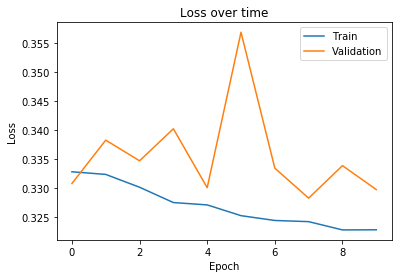

In [31]:
# Looking at the model's loss over time
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss over time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

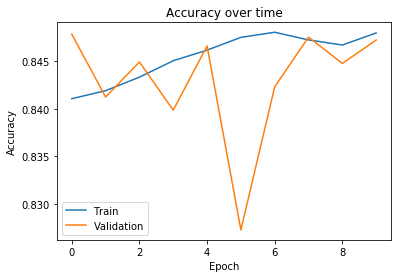

In [37]:
# Looking at the accuracy over time
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy over time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower left')

In [71]:
# Setting up the test set
# Setting up a new version of the data_prep function, this is mostly due to some slight difference in the data
def data_prep_test(data):
    df = data.copy()
#     Mainly the label mapping was off as the string used for the labels in the train and test set are different
    label_map = {' >50K.' : 0, ' <=50K.': 1}
    df['label'] = df['label'].map(label_map)
    scaler = MinMaxScaler()
    df[['fnlweight', 'capital_gain', 'capital_loss']] = scaler.fit_transform(df[['fnlweight', 'capital_gain', 'capital_loss']])
    df = df.drop(['education_num'], axis=1)
    return df

test = data_prep_test(test)
test = df_to_dataset(test)

In [72]:
# Evaluating the test model
loss, accuray = model.evaluate(test)

509/509 [==============================] - 3s 5ms/step - loss: 0.3636 - accuracy: 0.8170
